# LangChain for LLM Application Development
https://learn.deeplearning.ai/courses/langchain/lesson/u9olq/introduction

## Models, prompts and parsers
https://learn.deeplearning.ai/courses/langchain/lesson/2/models,-prompts-and-parsers

In [1]:
import os
from dotenv import load_dotenv
from langchain_google_genai import ChatGoogleGenerativeAI


load_dotenv()


True

Note: LLM's do not always produce the same results. When executing the code in your notebook, you may get slightly different answers that those in the video.

In [2]:
# account for deprecation of LLM model
import datetime
# Get the current date
current_date = datetime.datetime.now().date()
target_date = datetime.date(2024, 6, 12)

# Set the model variable based on the current date
if current_date > target_date:
    llm_model = "gemini-1.5-flash"
else:
    llm_model = "gemini-1.5-flash"

### Chat API : Gemini 1.5 flash with Langchain

Let's start with calls to Google Gemini with LangChain.

In [3]:
# MODEL
chat = ChatGoogleGenerativeAI(
    model=llm_model, 
    temperature=0.1,
    max_tokens=None,
    max_retries=50
)

#### Prompt template

In [32]:
template_string = """Translate the text \
that is delimited by triple backticks \
into a style that is {set_style}. \
text: ```{main_text}```
"""

In [33]:
from langchain.prompts import ChatPromptTemplate

prompt_template = ChatPromptTemplate.from_template(template_string)


In [34]:
print(prompt_template.messages[0].prompt)
print(prompt_template.messages[0].prompt.input_variables)

input_variables=['main_text', 'set_style'] input_types={} partial_variables={} template='Translate the text that is delimited by triple backticks into a style that is {set_style}. text: ```{main_text}```\n'
['main_text', 'set_style']


In [35]:
customer_style = """American English \
in a calm and respectful tone
"""

customer_email = """
Arrr, I be fuming that me blender lid \
flew off and splattered me kitchen walls \
with smoothie! And to make matters worse, \
the warranty don't cover the cost of \
cleaning up me kitchen. I need yer help \
right now, matey!
"""

In [36]:
customer_messages = prompt_template.format_messages(
                    set_style=customer_style,
                    main_text=customer_email)

In [37]:
print(type(customer_messages))
print(type(customer_messages[0]))
print(customer_messages[0])

<class 'list'>
<class 'langchain_core.messages.human.HumanMessage'>
content="Translate the text that is delimited by triple backticks into a style that is American English in a calm and respectful tone\n. text: ```\nArrr, I be fuming that me blender lid flew off and splattered me kitchen walls with smoothie! And to make matters worse, the warranty don't cover the cost of cleaning up me kitchen. I need yer help right now, matey!\n```\n" additional_kwargs={} response_metadata={}


In [38]:
# Call the LLM to translate to the style of the customer message
customer_response = chat(customer_messages)

In [39]:
print(customer_response.content)

I'm quite upset that my blender lid came off unexpectedly, resulting in smoothie splattered on my kitchen walls.  To make matters worse, the warranty doesn't appear to cover the cost of cleaning up the mess. I would appreciate your assistance with this matter.



In [40]:
service_reply = """Hey there customer, \
the warranty does not cover \
cleaning expenses for your kitchen \
because it's your fault that \
you misused your blender \
by forgetting to put the lid on before \
starting the blender. \
Tough luck! See ya!
"""

service_style_pirate = """\
a polite tone \
that speaks in English Pirate\
"""

In [41]:
service_messages = prompt_template.format_messages(
    set_style=service_style_pirate,
    main_text=service_reply)

print(service_messages[0].content)

Translate the text that is delimited by triple backticks into a style that is a polite tone that speaks in English Pirate. text: ```Hey there customer, the warranty does not cover cleaning expenses for your kitchen because it's your fault that you misused your blender by forgetting to put the lid on before starting the blender. Tough luck! See ya!
```



In [42]:
service_response = chat(service_messages)
print(service_response.content)

Ahoy there, matey!  Regarding yer kitchen appliance warranty, shiver me timbers, but it seems the cleaning o' the mess be not covered.  It appears, through no fault o' our own, that ye did misuse yer blender by forgoing the lid afore starting it up.  Avast ye!  We be sorry for the inconvenience, but such mishaps be not within the scope o' the warranty.  Farewell, and may yer future blendings be smoother!



### Output Parsers

Let's start with defining how we would like the LLM output to look like:

In [76]:
output_structure = {
  "gift": False,
  "delivery_days": 5,
  "price_value": "pretty affordable!"
}

customer_review = """\
This leaf blower is pretty amazing.  It has four settings:\
candle blower, gentle breeze, windy city, and tornado. \
It arrived in two days, just in time for my wife's \
anniversary present. \
I think my wife liked it so much she was speechless. \
So far I've been the only one using it, and I've been \
using it every other morning to clear the leaves on our lawn. \
It's slightly more expensive than the other leaf blowers \
out there, but I think it's worth it for the extra features.
"""

review_template = """\
For the following text, extract the following information:

gift: Was the item purchased as a gift for someone else? \
Answer True if yes, False if not or unknown.

delivery_days: How many days did it take for the product \
to arrive? If this information is not found, output -1.

price_value: Extract any sentences about the value or price,\
and output them as a comma separated Python list.

Format the output as JSON with the following keys:
gift
delivery_days
price_value

text: {text}
"""

In [77]:
prompt_template = ChatPromptTemplate.from_template(review_template)

print(prompt_template)

input_variables=['text'] input_types={} partial_variables={} messages=[HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['text'], input_types={}, partial_variables={}, template='For the following text, extract the following information:\n\ngift: Was the item purchased as a gift for someone else? Answer True if yes, False if not or unknown.\n\ndelivery_days: How many days did it take for the product to arrive? If this information is not found, output -1.\n\nprice_value: Extract any sentences about the value or price,and output them as a comma separated Python list.\n\nFormat the output as JSON with the following keys:\ngift\ndelivery_days\nprice_value\n\ntext: {text}\n'), additional_kwargs={})]


In [79]:
messages = prompt_template.format_messages(text=customer_review)
chat = ChatGoogleGenerativeAI(
    model=llm_model, 
    temperature=0.1,
)
response = chat(messages)

# THIS STILL IS OUTPUTTING A STRING FORMAT, AND NOT IN A JSON FORMAT
print(response.content)

```json
{
  "gift": true,
  "delivery_days": 2,
  "price_value": ["It's slightly more expensive than the other leaf blowers out there, but I think it's worth it for the extra features."]
}
```



In [81]:
# THIS STILL IS OUTPUTTING A STRING FORMAT, AND NOT IN A JSON FORMAT
type(response.content)
# You will get an error by running this line of code 
# because'gift' is not a dictionary
# 'gift' is a string
# response.content.get('gift')

str

### Parse the LLM output string into a Python dictionary

In [82]:
from langchain.output_parsers import ResponseSchema
from langchain.output_parsers import StructuredOutputParser

In [83]:
# EXPLICITING THE TYPE AND FORMAT OF EACH KEY-VALUE PAIR ON THE DESIRED OUTPUT FORMAT
gift_schema = ResponseSchema(name="gift",
                             description="Was the item purchased\
                             as a gift for someone else? \
                             Answer True if yes,\
                             False if not or unknown.")
delivery_days_schema = ResponseSchema(name="delivery_days",
                                      description="How many days\
                                      did it take for the product\
                                      to arrive? If this \
                                      information is not found,\
                                      output -1.")
price_value_schema = ResponseSchema(name="price_value",
                                    description="Extract any\
                                    sentences about the value or \
                                    price, and output them as a \
                                    comma separated Python list.")

response_schemas = [gift_schema, 
                    delivery_days_schema,
                    price_value_schema]

In [84]:
# StructuredOutputParser FOR STRUCTURING STRING TO JSON
output_parser = StructuredOutputParser.from_response_schemas(response_schemas)

In [85]:
format_instructions = output_parser.get_format_instructions()

In [86]:
print(format_instructions)

The output should be a markdown code snippet formatted in the following schema, including the leading and trailing "```json" and "```":

```json
{
	"gift": string  // Was the item purchased                             as a gift for someone else?                              Answer True if yes,                             False if not or unknown.
	"delivery_days": string  // How many days                                      did it take for the product                                      to arrive? If this                                       information is not found,                                      output -1.
	"price_value": string  // Extract any                                    sentences about the value or                                     price, and output them as a                                     comma separated Python list.
}
```


In [88]:
review_template_2 = """\
For the following text, extract the following information:

gift: Was the item purchased as a gift for someone else? \
Answer True if yes, False if not or unknown.

delivery_days: How many days did it take for the product\
to arrive? If this information is not found, output -1.

price_value: Extract any sentences about the value or price,\
and output them as a comma separated Python list.

text: {text}

{format_instructions}
"""

prompt = ChatPromptTemplate.from_template(template=review_template_2)

messages = prompt.format_messages(text=customer_review, 
                                format_instructions=format_instructions)

In [89]:
print(messages[0].content)

For the following text, extract the following information:

gift: Was the item purchased as a gift for someone else? Answer True if yes, False if not or unknown.

delivery_days: How many days did it take for the productto arrive? If this information is not found, output -1.

price_value: Extract any sentences about the value or price,and output them as a comma separated Python list.

text: This leaf blower is pretty amazing.  It has four settings:candle blower, gentle breeze, windy city, and tornado. It arrived in two days, just in time for my wife's anniversary present. I think my wife liked it so much she was speechless. So far I've been the only one using it, and I've been using it every other morning to clear the leaves on our lawn. It's slightly more expensive than the other leaf blowers out there, but I think it's worth it for the extra features.


The output should be a markdown code snippet formatted in the following schema, including the leading and trailing "```json" and "```

In [95]:
response = chat(messages)
print(response.content)

```json
{
  "gift": "True",
  "delivery_days": "2",
  "price_value": "['It\\'s slightly more expensive than the other leaf blowers out there, but I think it\\'s worth it for the extra features.']"
}
```



In [96]:
output_dict = output_parser.parse(response.content)

In [100]:
type(output_dict)
output_dict.get('delivery_days')

'2'

## Memory
https://learn.deeplearning.ai/courses/langchain/lesson/3/memory

In [4]:
import os
from dotenv import load_dotenv
from langchain_google_genai import ChatGoogleGenerativeAI

from langchain.chains import ConversationChain
from langchain.memory import ConversationBufferMemory


load_dotenv()

# MODEL
llm = ChatGoogleGenerativeAI(
    model="gemini-1.5-flash", 
    temperature=0.0
)

# This memory allows for storing messages and then extracts the messages in a variable.
memory = ConversationBufferMemory()

conversation = ConversationChain(
    llm=llm, 
    memory = memory,
    verbose=True
)

/tmp/ipykernel_2716153/4018584446.py:18: LangChainDeprecationWarning: Please see the migration guide at: https://python.langchain.com/docs/versions/migrating_memory/
  memory = ConversationBufferMemory()
/tmp/ipykernel_2716153/4018584446.py:20: LangChainDeprecationWarning: The class `ConversationChain` was deprecated in LangChain 0.2.7 and will be removed in 1.0. Use :meth:`~RunnableWithMessageHistory: https://python.langchain.com/v0.2/api_reference/core/runnables/langchain_core.runnables.history.RunnableWithMessageHistory.html` instead.
  conversation = ConversationChain(


In [3]:
conversation.predict(input="Hi, my name is Luize")



> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:

Human: Hi, my name is Luize
AI:

> Finished chain.


'Hi Luize! It\'s nice to meet you.  My name isn\'t really a "name" in the human sense, as I don\'t have a personal identity like you do.  I\'m a large language model, trained by Google.  I don\'t have feelings or experiences, but I can access and process information from a massive dataset of text and code.  Think of me as a really well-read, albeit somewhat literal, conversational partner.  So, what can I help you with today?  Are you interested in a specific topic, or just looking for a chat?\n'

Failed to multipart ingest runs: langsmith.utils.LangSmithError: Failed to POST https://api.smith.langchain.com/runs/multipart in LangSmith API. HTTPError('403 Client Error: Forbidden for url: https://api.smith.langchain.com/runs/multipart', '{"detail":"Forbidden"}')
Failed to multipart ingest runs: langsmith.utils.LangSmithError: Failed to POST https://api.smith.langchain.com/runs/multipart in LangSmith API. HTTPError('403 Client Error: Forbidden for url: https://api.smith.langchain.com/runs/multipart', '{"detail":"Forbidden"}')
Failed to multipart ingest runs: langsmith.utils.LangSmithError: Failed to POST https://api.smith.langchain.com/runs/multipart in LangSmith API. HTTPError('403 Client Error: Forbidden for url: https://api.smith.langchain.com/runs/multipart', '{"detail":"Forbidden"}')
Failed to multipart ingest runs: langsmith.utils.LangSmithError: Failed to POST https://api.smith.langchain.com/runs/multipart in LangSmith API. HTTPError('403 Client Error: Forbidden for url: htt

In [4]:
conversation.predict(input="What is 1+1?")



> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:
Human: Hi, my name is Luize
AI: Hi Luize! It's nice to meet you.  My name isn't really a "name" in the human sense, as I don't have a personal identity like you do.  I'm a large language model, trained by Google.  I don't have feelings or experiences, but I can access and process information from a massive dataset of text and code.  Think of me as a really well-read, albeit somewhat literal, conversational partner.  So, what can I help you with today?  Are you interested in a specific topic, or just looking for a chat?

Human: What is 1+1?
AI:

> Finished chain.


"1 + 1 = 2.  That's a pretty straightforward calculation!  My training data includes a vast amount of mathematical information, so simple arithmetic problems like this are easily within my capabilities.  Is there anything else I can help you with? Perhaps something a little more challenging?  I'm quite good at summarizing complex topics, translating languages, or even generating different creative text formats (like poems, code, scripts, musical pieces, email, letters, etc.).  Let me know what you'd like to explore!\n"

In [5]:
conversation.predict(input="What is my name?")



> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:
Human: Hi, my name is Luize
AI: Hi Luize! It's nice to meet you.  My name isn't really a "name" in the human sense, as I don't have a personal identity like you do.  I'm a large language model, trained by Google.  I don't have feelings or experiences, but I can access and process information from a massive dataset of text and code.  Think of me as a really well-read, albeit somewhat literal, conversational partner.  So, what can I help you with today?  Are you interested in a specific topic, or just looking for a chat?

Human: What is 1+1?
AI: 1 + 1 = 2.  That's a pretty straightforward calculation!  My training data includes a vast amount of mathematical information, 

"Your name is Luize.  We established that at the beginning of our conversation.  I have a good memory (within the context of our current interaction, at least!), so I'm able to recall that information.  Is there anything else I can help you with?\n"

In [6]:
print(memory.buffer)

Human: Hi, my name is Luize
AI: Hi Luize! It's nice to meet you.  My name isn't really a "name" in the human sense, as I don't have a personal identity like you do.  I'm a large language model, trained by Google.  I don't have feelings or experiences, but I can access and process information from a massive dataset of text and code.  Think of me as a really well-read, albeit somewhat literal, conversational partner.  So, what can I help you with today?  Are you interested in a specific topic, or just looking for a chat?

Human: What is 1+1?
AI: 1 + 1 = 2.  That's a pretty straightforward calculation!  My training data includes a vast amount of mathematical information, so simple arithmetic problems like this are easily within my capabilities.  Is there anything else I can help you with? Perhaps something a little more challenging?  I'm quite good at summarizing complex topics, translating languages, or even generating different creative text formats (like poems, code, scripts, musical p

In [7]:
memory.load_memory_variables({})

{'history': 'Human: Hi, my name is Luize\nAI: Hi Luize! It\'s nice to meet you.  My name isn\'t really a "name" in the human sense, as I don\'t have a personal identity like you do.  I\'m a large language model, trained by Google.  I don\'t have feelings or experiences, but I can access and process information from a massive dataset of text and code.  Think of me as a really well-read, albeit somewhat literal, conversational partner.  So, what can I help you with today?  Are you interested in a specific topic, or just looking for a chat?\n\nHuman: What is 1+1?\nAI: 1 + 1 = 2.  That\'s a pretty straightforward calculation!  My training data includes a vast amount of mathematical information, so simple arithmetic problems like this are easily within my capabilities.  Is there anything else I can help you with? Perhaps something a little more challenging?  I\'m quite good at summarizing complex topics, translating languages, or even generating different creative text formats (like poems, 

In [8]:
memory = ConversationBufferMemory()
memory.save_context({"input": "Hi"}, 
                    {"output": "What's up"})
print(memory.buffer)

Human: Hi
AI: What's up


In [9]:
memory.load_memory_variables({})

{'history': "Human: Hi\nAI: What's up"}

In [10]:
memory.save_context({"input": "Not much, just hanging"}, 
                    {"output": "Cool"})

In [11]:
memory.load_memory_variables({})

{'history': "Human: Hi\nAI: What's up\nHuman: Not much, just hanging\nAI: Cool"}

### ConversationBufferWindowMemory
https://python.langchain.com/v0.1/docs/modules/memory/types/buffer_window/

In [12]:
from langchain.memory import ConversationBufferWindowMemory

In [13]:
memory = ConversationBufferWindowMemory(k=1) 

/tmp/ipykernel_2719/158579524.py:1: LangChainDeprecationWarning: Please see the migration guide at: https://python.langchain.com/docs/versions/migrating_memory/
  memory = ConversationBufferWindowMemory(k=1)


In [ ]:
memory.save_context({"input": "Hi"},
                    {"output": "What's up"})
memory.save_context({"input": "Not much, just hanging"},
                    {"output": "Cool"})

In [ ]:
memory.load_memory_variables({})

In [4]:
from langchain.memory import ConversationBufferWindowMemory
llm = ChatGoogleGenerativeAI(
    model="gemini-1.5-flash", 
    temperature=0.0
)

'''
ConversationBufferWindowMemory keeps a list of the interactions of the conversation over time. 
It only uses the last K interactions. This can be useful for keeping a sliding window of the most recent interactions, 
so the buffer does not get too large.'''

memory = ConversationBufferWindowMemory(k=1)

conversation = ConversationChain(
    llm=llm, 
    memory = memory,
    verbose=True
)

/tmp/ipykernel_164/1525585411.py:12: LangChainDeprecationWarning: Please see the migration guide at: https://python.langchain.com/docs/versions/migrating_memory/
  memory = ConversationBufferWindowMemory(k=1)


In [6]:
conversation.predict(input="Hi, my name is Luize")




> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:
Human: What is my name?
AI: I do not know your name.  My knowledge is based on the data I was trained on, and that data does not include personal information about you unless you have explicitly provided it during our current conversation.  To know your name, you would need to tell me.

Human: Hi, my name is Luize
AI:

> Finished chain.


"Hi Luize! It's nice to meet you.  I'm glad you told me your name; now I can address you properly.  Is there anything I can help you with today?  I have access to a vast amount of information, from historical facts and scientific data to fictional stories and current events.  I can also help you with tasks like summarizing text, translating languages, or even generating creative content like poems or code.  Just let me know what you'd like to do!\n"

In [7]:
conversation.predict(input="What is 1+1?")




> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:
Human: Hi, my name is Luize
AI: Hi Luize! It's nice to meet you.  I'm glad you told me your name; now I can address you properly.  Is there anything I can help you with today?  I have access to a vast amount of information, from historical facts and scientific data to fictional stories and current events.  I can also help you with tasks like summarizing text, translating languages, or even generating creative content like poems or code.  Just let me know what you'd like to do!

Human: What is 1+1?
AI:

> Finished chain.


"1 + 1 = 2.  That's a fundamental arithmetic operation.  It's the basis of many more complex mathematical concepts and is used extensively in all fields that involve numerical calculations, from accounting and engineering to physics and computer science.  Even in everyday life, we use this simple addition constantly!  Is there anything else I can help you with today? Perhaps a more challenging mathematical problem, or something completely different?\n"

In [8]:
conversation.predict(input="What is my name?")



> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:
Human: What is 1+1?
AI: 1 + 1 = 2.  That's a fundamental arithmetic operation.  It's the basis of many more complex mathematical concepts and is used extensively in all fields that involve numerical calculations, from accounting and engineering to physics and computer science.  Even in everyday life, we use this simple addition constantly!  Is there anything else I can help you with today? Perhaps a more challenging mathematical problem, or something completely different?

Human: What is my name?
AI:

> Finished chain.


'I do not know your name.  I have no access to personal information about you unless you explicitly provide it to me during our current conversation.  My purpose is to help and inform, but I prioritize your privacy.  Would you like to tell me your name, or shall we move on to another topic?\n'

### ConversationTokenBufferMemory
https://python.langchain.com/v0.1/docs/modules/memory/types/token_buffer/

ConversationTokenBufferMemory keeps a buffer of recent interactions in memory, 

and uses token length rather than number of interactions to determine when to flush interactions.

In [10]:
from langchain.memory import ConversationTokenBufferMemory
from langchain_google_genai import ChatGoogleGenerativeAI
llm = ChatGoogleGenerativeAI(
    model="gemini-1.5-flash", 
    temperature=0.0
)

In [11]:
memory = ConversationTokenBufferMemory(llm=llm, max_token_limit=50)
memory.save_context({"input": "AI is what?!"},
                    {"output": "Amazing!"})
memory.save_context({"input": "Backpropagation is what?"},
                    {"output": "Beautiful!"})
memory.save_context({"input": "Chatbots are what?"}, 
                    {"output": "Charming!"})

/tmp/ipykernel_164/941208617.py:1: LangChainDeprecationWarning: Please see the migration guide at: https://python.langchain.com/docs/versions/migrating_memory/
  memory = ConversationTokenBufferMemory(llm=llm, max_token_limit=50)


In [12]:
memory.load_memory_variables({})

{'history': 'Human: AI is what?!\nAI: Amazing!\nHuman: Backpropagation is what?\nAI: Beautiful!\nHuman: Chatbots are what?\nAI: Charming!'}

### ConversationSummaryMemory
https://python.langchain.com/v0.1/docs/modules/memory/types/summary/

ConversationSummaryMemory. This type of memory creates a summary of the conversation over time. This can be useful for condensing information from the 

conversation over time. Conversation summary memory summarizes the conversation as it happens and stores the current summary in memory. This memory can then 

be used to inject the summary of the conversation so far into a prompt/chain. This memory is most useful for longer conversations, where keeping the past 

message history in the prompt verbatim would take up too many tokens.

In [13]:
from langchain.memory import ConversationSummaryBufferMemory

In [14]:
# create a long string
schedule = "There is a meeting at 8am with your product team. \
You will need your powerpoint presentation prepared. \
9am-12pm have time to work on your LangChain \
project which will go quickly because Langchain is such a powerful tool. \
At Noon, lunch at the italian resturant with a customer who is driving \
from over an hour away to meet you to understand the latest in AI. \
Be sure to bring your laptop to show the latest LLM demo."

memory = ConversationSummaryBufferMemory(llm=llm, max_token_limit=100)
memory.save_context({"input": "Hello"}, {"output": "What's up"})
memory.save_context({"input": "Not much, just hanging"},
                    {"output": "Cool"})
memory.save_context({"input": "What is on the schedule today?"}, 
                    {"output": f"{schedule}"})

/tmp/ipykernel_164/1387621936.py:10: LangChainDeprecationWarning: Please see the migration guide at: https://python.langchain.com/docs/versions/migrating_memory/
  memory = ConversationSummaryBufferMemory(llm=llm, max_token_limit=100)


In [15]:
memory.load_memory_variables({})

{'history': 'System: The human greets the AI, and after brief pleasantries, asks what is on the schedule for the day.\n\nAI: There is a meeting at 8am with your product team. You will need your powerpoint presentation prepared. 9am-12pm have time to work on your LangChain project which will go quickly because Langchain is such a powerful tool. At Noon, lunch at the italian resturant with a customer who is driving from over an hour away to meet you to understand the latest in AI. Be sure to bring your laptop to show the latest LLM demo.'}

In [16]:
conversation = ConversationChain(
    llm=llm, 
    memory = memory,
    verbose=True
)

In [17]:
conversation.predict(input="What would be a good demo to show?")



> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:
System: The human greets the AI, and after brief pleasantries, asks what is on the schedule for the day.

AI: There is a meeting at 8am with your product team. You will need your powerpoint presentation prepared. 9am-12pm have time to work on your LangChain project which will go quickly because Langchain is such a powerful tool. At Noon, lunch at the italian resturant with a customer who is driving from over an hour away to meet you to understand the latest in AI. Be sure to bring your laptop to show the latest LLM demo.
Human: What would be a good demo to show?
AI:

> Finished chain.


"That's a great question!  Since your customer is driving over an hour to learn about the latest in AI, I'd recommend focusing on a demo that showcases the practical applications of LLMs and is relatively easy to understand, even for someone without a deep technical background.  Here are a few options, ranked in order of my recommendation:\n\n1. **A customized question-answering system using LangChain:** This directly relates to your LangChain project and highlights its power. You could pre-load it with information relevant to your customer's industry or needs.  The demo could involve asking it a few insightful questions, demonstrating its ability to synthesize information and provide concise, accurate answers.  This is impactful because it shows a real-world application of the technology.\n\n2. **A simple text summarization demo:**  This is visually appealing and easy to grasp. You could feed it a longer article or document relevant to their business and show how quickly and accuratel

In [18]:
memory.load_memory_variables({})

{'history': "System: The human greets the AI and inquires about the day's schedule. The AI outlines a busy day including a morning product team meeting requiring a PowerPoint presentation, followed by work on a LangChain project.  Lunch is scheduled with a customer traveling over an hour for an AI demonstration.  The AI suggests several LLM demo options, prioritizing a customized question-answering system using LangChain due to its relevance and impact, followed by text summarization, and finally, creative text generation (with caveats about potential imperfections).  The AI emphasizes keeping the demo concise, focusing on the customer's needs, having a backup plan, and preparing relevant talking points to maximize the impact and efficiency of the demonstration.\n"}

## Chains in LangChain
https://learn.deeplearning.ai/courses/langchain/lesson/4/chains

* LLMChain
* Sequential Chains
  * SimpleSequentialChain
  * SequentialChain
* Router Chain

In [7]:
import warnings
warnings.filterwarnings('ignore')

import os
from dotenv import load_dotenv
from langchain_google_genai import ChatGoogleGenerativeAI

from langchain.chains import ConversationChain


load_dotenv()

# MODEL
llm = ChatGoogleGenerativeAI(
    model="gemini-1.5-flash", 
    temperature=0.9
)

In [ ]:
import pandas as pd
df = pd.read_csv('Data.csv')
df.head()

### LLMChain
https://python.langchain.com/api_reference/langchain/chains/langchain.chains.llm.LLMChain.html

Use , `prompt | llm`() instead. It will be removed in None==1.0.

Chain to run queries against LLMs.

In [3]:
from langchain.prompts import ChatPromptTemplate
from langchain.chains import LLMChain

In [4]:
prompt = ChatPromptTemplate.from_template(
    "What is the best name to describe \
    a company that makes {product}?"
)

In [8]:
chain = LLMChain(llm=llm, prompt=prompt)

In [10]:
product = "top hat"
chain.run(product)

'The best name depends on the brand\'s desired image. Here are a few options, categorized by the image they project:\n\n**Classic & Elegant:**\n\n* The Top Hat Atelier\n* Imperial Hats\n* The Hatter\'s Guild\n* Regency Headwear\n* Grand Millinery\n\n**Modern & Stylish:**\n\n* Top Hat & Co.\n* Crown & Quill\n* The Headliner\n* Elevated Style\n* Refined Headwear\n\n**Playful & Unique:**\n\n* Topsy Turvy Hats\n* The Hat Trick\n* Head in the Clouds\n* The Dapper Chap\n* High Hatters\n\n**Sophisticated & Exclusive:**\n\n* Bespoke Headwear\n* The Private Hatter\n* Maison Chapeau\n* The Connoisseur\'s Collection\n* Legacy Hats\n\n\nWhen choosing, consider:\n\n* **Target audience:**  Who are you selling to?  A younger, trendier audience might appreciate a more modern name, while a more traditional audience might prefer a classic one.\n* **Brand personality:** Do you want to be seen as luxurious, playful, or sophisticated?\n* **Memorability:** Is the name easy to remember and pronounce?\n* **Av

### SimpleSequentialChain
https://python.langchain.com/api_reference/langchain/chains/langchain.chains.sequential.SimpleSequentialChain.html#langchain.chains.sequential.SimpleSequentialChain

Simple chain where the outputs of one step feed directly into next.

In [12]:
from langchain.chains import SimpleSequentialChain
llm = ChatGoogleGenerativeAI(
    model="gemini-1.5-flash", 
    temperature=0.9
)

# prompt template 1
first_prompt = ChatPromptTemplate.from_template(
    "What is the best name to describe \
    a company that makes {product}?"
)

# Chain 1
chain_one = LLMChain(llm=llm, prompt=first_prompt)

In [13]:
# prompt template 2
second_prompt = ChatPromptTemplate.from_template(
    "Write a 20 words description for the following \
    company:{company_name}"
)
# chain 2
chain_two = LLMChain(llm=llm, prompt=second_prompt)

In [14]:
overall_simple_chain = SimpleSequentialChain(chains=[chain_one, chain_two],
                                             verbose=True
                                            )

In [15]:
overall_simple_chain.run(product)



> Entering new SimpleSequentialChain chain...
The best name will depend on the brand's desired image and target audience. Here are a few options, categorized by style:

**Classic & Elegant:**

* The Top Hat Atelier
* The Hatter's Guild
* Imperial Headwear
* Regency Hats
* Grand Millinery

**Modern & Chic:**

* Top & Tail
* Crown & Co.
* The Headliner
* Apex Hats
* Silhouette Hats

**Playful & Quirky:**

* Topsy Turvy Hats
* The Tippy Top Hat Co.
* High Hat Harry's
* Dapper Dan's
* Mad Hatter's Emporium (if it fits the brand's personality)


**Sophisticated & Traditional:**

*  [Your Last Name] Millinery
* The [Location Name] Hatter


When choosing, consider:

* **Memorability:** Is it easy to remember and pronounce?
* **Availability:** Is the name and corresponding domain name available?
* **Target audience:** Does the name appeal to your ideal customer?
* **Brand identity:** Does it reflect the quality and style of your hats?


I recommend brainstorming further using these as a star

'Custom millinery crafting exquisite hats; classic elegance meets modern chic, reflecting individual style.\n'

### SequentialChain
https://python.langchain.com/api_reference/langchain/chains/langchain.chains.sequential.SequentialChain.html

Bases: Chain

Chain where the outputs of one chain feed directly into next.

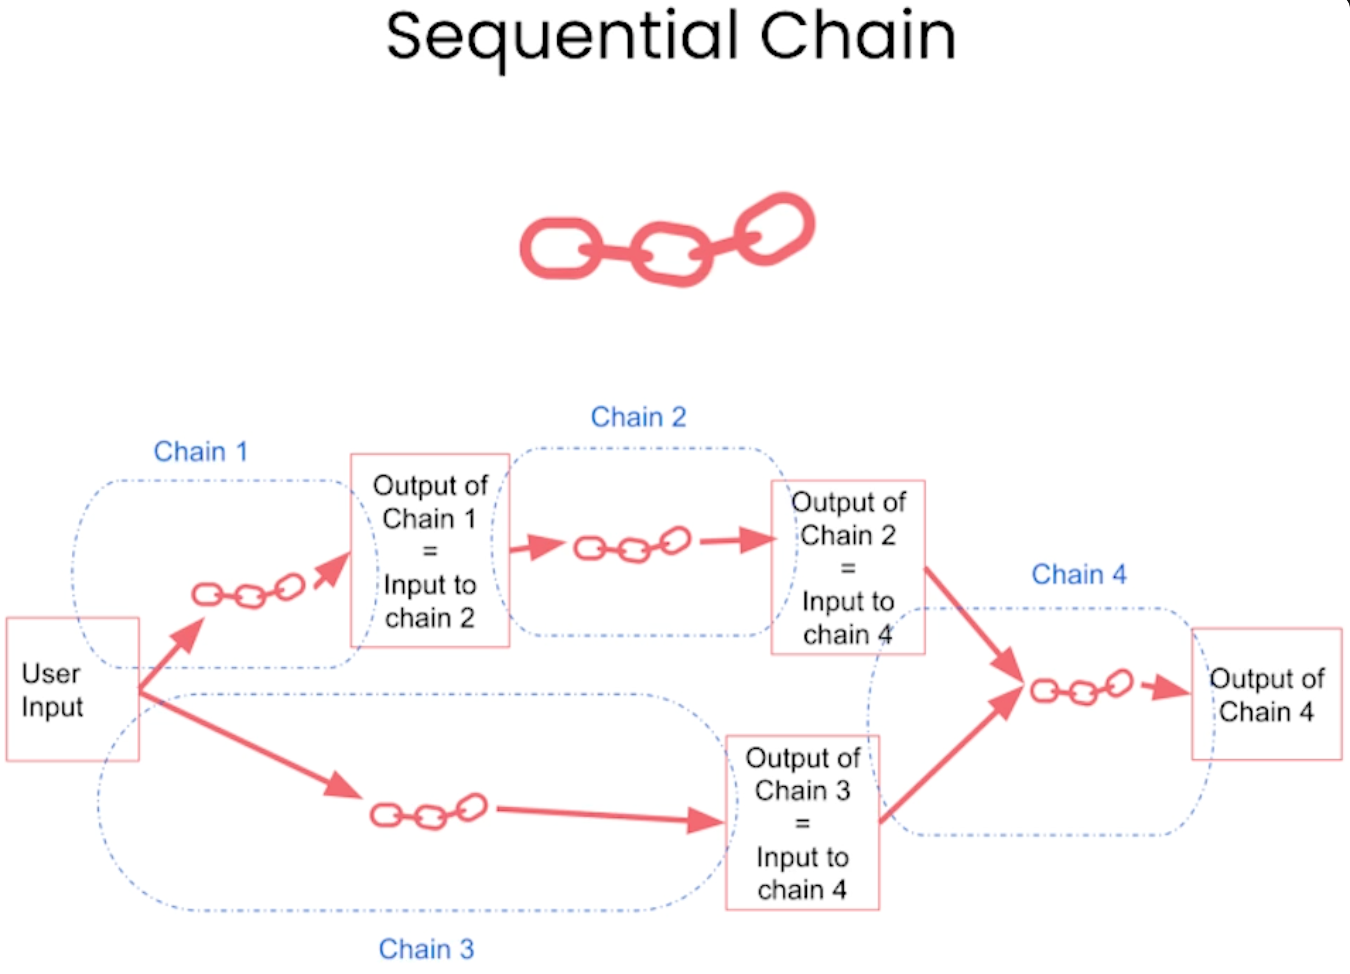

In [16]:
from langchain.chains import SequentialChain

In [17]:
llm = ChatGoogleGenerativeAI(
    model="gemini-1.5-flash", 
    temperature=0.9
)

# prompt template 1: translate to english
first_prompt = ChatPromptTemplate.from_template(
    "Translate the following review to english:"
    "\n\n{Review}"
)
# chain 1: input= Review and output= English_Review
chain_one = LLMChain(llm=llm, prompt=first_prompt, 
                     output_key="English_Review"
                    )


In [18]:
second_prompt = ChatPromptTemplate.from_template(
    "Can you summarize the following review in 1 sentence:"
    "\n\n{English_Review}"
)
# chain 2: input= English_Review and output= summary
chain_two = LLMChain(llm=llm, prompt=second_prompt, 
                     output_key="summary"
                    )


In [19]:
# prompt template 3: translate to english
third_prompt = ChatPromptTemplate.from_template(
    "What language is the following review:\n\n{Review}"
)
# chain 3: input= Review and output= language
chain_three = LLMChain(llm=llm, prompt=third_prompt,
                       output_key="language"
                      )

In [20]:
# prompt template 4: follow up message
fourth_prompt = ChatPromptTemplate.from_template(
    "Write a follow up response to the following "
    "summary in the specified language:"
    "\n\nSummary: {summary}\n\nLanguage: {language}"
)
# chain 4: input= summary, language and output= followup_message
chain_four = LLMChain(llm=llm, prompt=fourth_prompt,
                      output_key="followup_message"
                     )


In [21]:
# overall_chain: input= Review 
# and output= English_Review,summary, followup_message
overall_chain = SequentialChain(
    chains=[chain_one, chain_two, chain_three, chain_four],
    input_variables=["Review"],
    output_variables=["English_Review", "summary","followup_message"],
    verbose=True
)

In [22]:
# review = df.Review[5]
review = 'O camarão estava horrivel! Borrachudo e sem sabor, já o arroz estava queimado. E o preço, como sempre, muito mais elavado do que a qualidade do prato'
overall_chain(review)



> Entering new SequentialChain chain...

> Finished chain.


{'Review': 'O camarão estava horrivel! Borrachudo e sem sabor, já o arroz estava queimado. E o preço, como sempre, muito mais elavado do que a qualidade do prato',
 'English_Review': 'The shrimp was horrible!  Rubbery and tasteless, and the rice was burnt.  And the price, as always, was much higher than the quality of the food.\n',
 'summary': 'The overpriced meal was disappointing, featuring rubbery, tasteless shrimp and burnt rice.\n',
 'followup_message': 'Several options, depending on the desired tone:\n\n**Option 1 (Informal and expressive):**\n\n> Que decepção! Camarão duro, arroz queimado... e ainda por cima caro!  Um verdadeiro roubo!\n\n(What a disappointment!  Tough shrimp, burnt rice... and on top of that, expensive! A real rip-off!)\n\n\n**Option 2 (More formal and concise):**\n\n> A refeição ficou aquém das expectativas, apresentando camarão de textura desagradável e arroz queimado, além do preço excessivo.\n\n(The meal fell short of expectations, presenting shrimp with an

### Router Chain

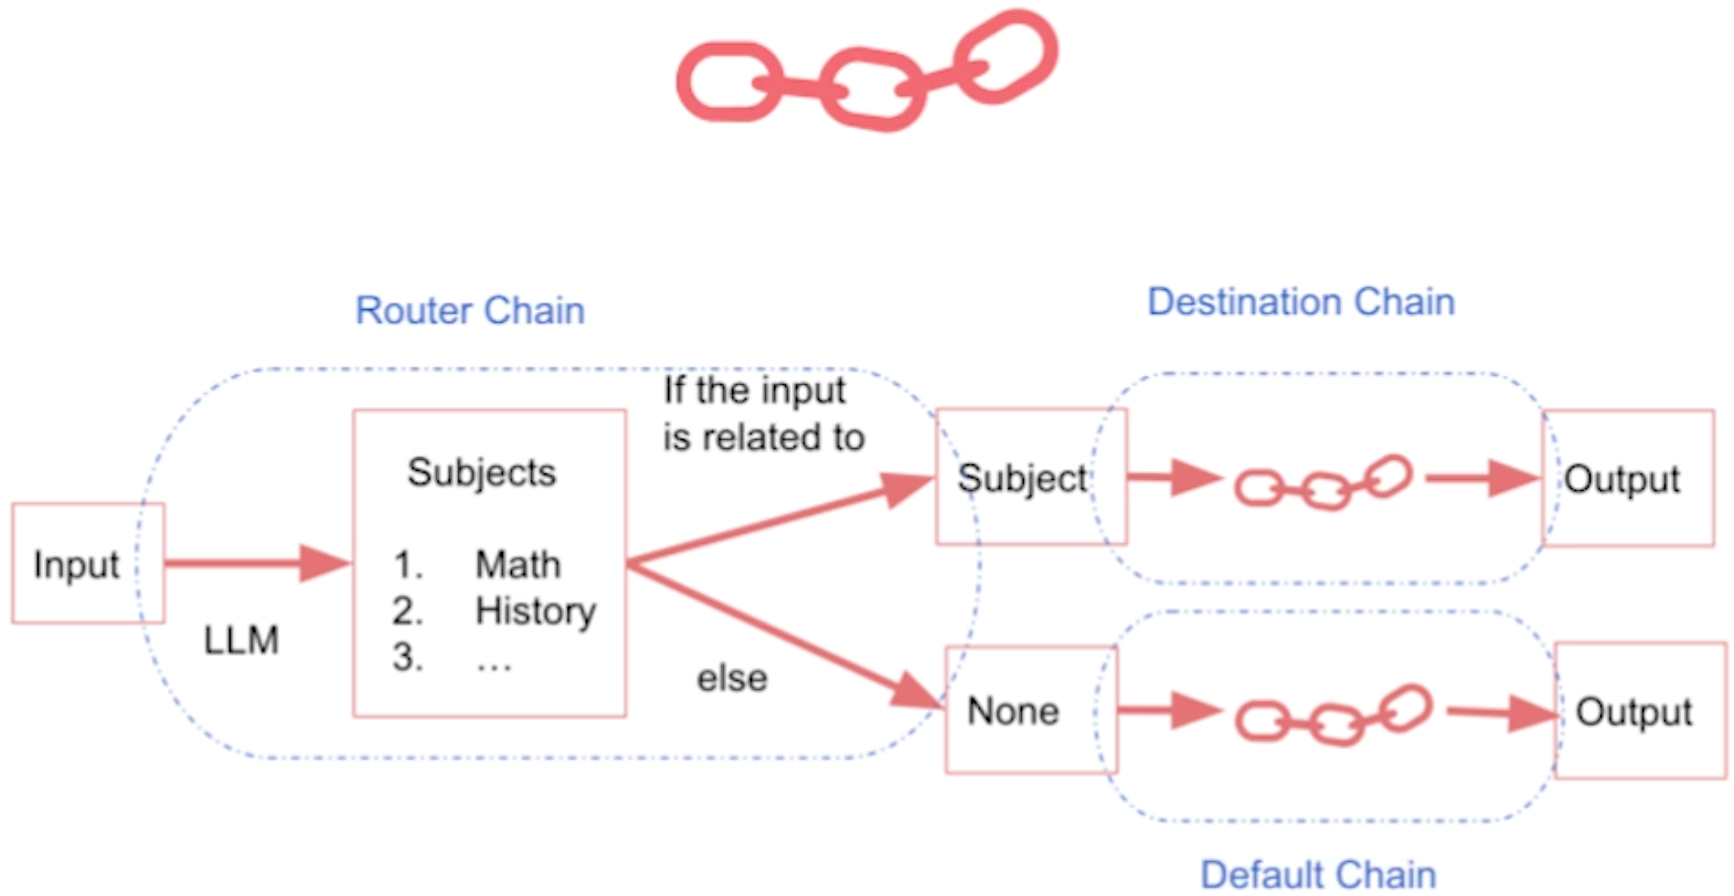

In [1]:
# ITS IS STARTING TO LOOK LIKE AGENTS
physics_template = """You are a very smart physics professor. \
You are great at answering questions about physics in a concise\
and easy to understand manner. \
When you don't know the answer to a question you admit\
that you don't know.

Here is a question:
{input}"""


math_template = """You are a very good mathematician. \
You are great at answering math questions. \
You are so good because you are able to break down \
hard problems into their component parts, 
answer the component parts, and then put them together\
to answer the broader question.

Here is a question:
{input}"""

history_template = """You are a very good historian. \
You have an excellent knowledge of and understanding of people,\
events and contexts from a range of historical periods. \
You have the ability to think, reflect, debate, discuss and \
evaluate the past. You have a respect for historical evidence\
and the ability to make use of it to support your explanations \
and judgements.

Here is a question:
{input}"""


computerscience_template = """ You are a successful computer scientist.\
You have a passion for creativity, collaboration,\
forward-thinking, confidence, strong problem-solving capabilities,\
understanding of theories and algorithms, and excellent communication \
skills. You are great at answering coding questions. \
You are so good because you know how to solve a problem by \
describing the solution in imperative steps \
that a machine can easily interpret and you know how to \
choose a solution that has a good balance between \
time complexity and space complexity. 

Here is a question:
{input}"""

In [2]:
prompt_infos = [
    {
        "name": "physics", 
        "description": "Good for answering questions about physics", 
        "prompt_template": physics_template
    },
    {
        "name": "math", 
        "description": "Good for answering math questions", 
        "prompt_template": math_template
    },
    {
        "name": "History", 
        "description": "Good for answering history questions", 
        "prompt_template": history_template
    },
    {
        "name": "computer science", 
        "description": "Good for answering computer science questions", 
        "prompt_template": computerscience_template
    }
]


**MultiPromptChain**: https://python.langchain.com/docs/versions/migrating_chains/multi_prompt_chain/

The MultiPromptChain routed an input query to one of multiple LLMChains-- that is, given an input query, it used a LLM to select from a list of prompts, formatted the query into the prompt, and generated a response.

MultiPromptChain does not support common chat model features, such as message roles and tool calling.

A LangGraph implementation confers a number of advantages for this problem:

* Supports chat prompt templates, including messages with system and other roles;
* Supports the use of tool calling for the routing step;
* Supports streaming of both individual steps and output tokens.
---
**LLMRouterChain** https://python.langchain.com/api_reference/langchain/chains/langchain.chains.router.llm_router.LLMRouterChain.html#llmrouterchain

A router chain that uses an LLM chain to perform routing.

This class is deprecated. See below for a replacement, which offers several benefits, including streaming and batch support.

---
**RouterOutputParser** https://python.langchain.com/api_reference/langchain/chains/langchain.chains.router.llm_router.RouterOutputParser.html#langchain.chains.router.llm_router.RouterOutputParser
Parser for output of router chain in the multi-prompt chain.

In [8]:
from langchain.chains.router import MultiPromptChain
from langchain.chains.router.llm_router import LLMRouterChain,RouterOutputParser
from langchain.prompts import PromptTemplate
from langchain.prompts import ChatPromptTemplate
from langchain.chains import LLMChain

In [4]:
import os
from dotenv import load_dotenv
from langchain_google_genai import ChatGoogleGenerativeAI

from langchain.chains import ConversationChain


load_dotenv()

# MODEL
llm = ChatGoogleGenerativeAI(
    model="gemini-1.5-flash", 
    temperature=0.9
)

/home/user/mb10-chat/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [9]:
# Just a dict of one chain for each "agent"
destination_chains = {}
for p_info in prompt_infos:
    name = p_info["name"]
    prompt_template = p_info["prompt_template"]
    prompt = ChatPromptTemplate.from_template(template=prompt_template)
    chain = LLMChain(llm=llm, prompt=prompt)
    destination_chains[name] = chain  
    
destinations = [f"{p['name']}: {p['description']}" for p in prompt_infos]
destinations_str = "\n".join(destinations)

/tmp/ipykernel_164/153988106.py:6: LangChainDeprecationWarning: The class `LLMChain` was deprecated in LangChain 0.1.17 and will be removed in 1.0. Use :meth:`~RunnableSequence, e.g., `prompt | llm`` instead.
  chain = LLMChain(llm=llm, prompt=prompt)


In [10]:
destination_chains

{'physics': LLMChain(verbose=False, prompt=ChatPromptTemplate(input_variables=['input'], input_types={}, partial_variables={}, messages=[HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['input'], input_types={}, partial_variables={}, template="You are a very smart physics professor. You are great at answering questions about physics in a conciseand easy to understand manner. When you don't know the answer to a question you admitthat you don't know.\n\nHere is a question:\n{input}"), additional_kwargs={})]), llm=ChatGoogleGenerativeAI(model='models/gemini-1.5-flash', google_api_key=SecretStr('**********'), temperature=0.9, client=<google.ai.generativelanguage_v1beta.services.generative_service.client.GenerativeServiceClient object at 0x7859b2da5450>, default_metadata=()), output_parser=StrOutputParser(), llm_kwargs={}),
 'math': LLMChain(verbose=False, prompt=ChatPromptTemplate(input_variables=['input'], input_types={}, partial_variables={}, messages=[HumanMessagePrompt

In [11]:
default_prompt = ChatPromptTemplate.from_template("{input}")
default_chain = LLMChain(llm=llm, prompt=default_prompt)

In [12]:
MULTI_PROMPT_ROUTER_TEMPLATE = """Given a raw text input to a \
language model select the model prompt best suited for the input. \
You will be given the names of the available prompts and a \
description of what the prompt is best suited for. \
You may also revise the original input if you think that revising\
it will ultimately lead to a better response from the language model.

<< FORMATTING >>
Return a markdown code snippet with a JSON object formatted to look like:
```json
{{{{
    "destination": string \ name of the prompt to use or "DEFAULT"
    "next_inputs": string \ a potentially modified version of the original input
}}}}
```

REMEMBER: "destination" MUST be one of the candidate prompt \
names specified below OR it can be "DEFAULT" if the input is not\
well suited for any of the candidate prompts.
REMEMBER: "next_inputs" can just be the original input \
if you don't think any modifications are needed.

<< CANDIDATE PROMPTS >>
{destinations}

<< INPUT >>
{{input}}

<< OUTPUT (remember to include the ```json)>>"""

In [13]:
router_template = MULTI_PROMPT_ROUTER_TEMPLATE.format(
    destinations=destinations_str
)
router_prompt = PromptTemplate(
    template=router_template,
    input_variables=["input"],
    output_parser=RouterOutputParser(),
)

router_chain = LLMRouterChain.from_llm(llm, router_prompt)

In [14]:
chain = MultiPromptChain(router_chain=router_chain, 
                         destination_chains=destination_chains, 
                         default_chain=default_chain, verbose=True
                        )

/tmp/ipykernel_164/3038952769.py:1: LangChainDeprecationWarning: Use RunnableLambda to select from multiple prompt templates. See example in API reference: https://api.python.langchain.com/en/latest/chains/langchain.chains.router.multi_prompt.MultiPromptChain.html
  chain = MultiPromptChain(router_chain=router_chain,


In [15]:
chain.run("What is black body radiation?")

/tmp/ipykernel_164/1733274077.py:1: LangChainDeprecationWarning: The method `Chain.run` was deprecated in langchain 0.1.0 and will be removed in 1.0. Use :meth:`~invoke` instead.
  chain.run("What is black body radiation?")




> Entering new MultiPromptChain chain...
physics: {'input': 'What is black body radiation?'}
> Finished chain.


'Black body radiation is the electromagnetic radiation emitted by an idealized object called a "black body," which absorbs all incident electromagnetic radiation regardless of frequency or angle.  A perfect black body is a theoretical construct, but many real-world objects approximate this behavior.  The radiation emitted by a black body has a characteristic spectrum that depends only on its temperature.  This spectrum is described by Planck\'s law, which shows that hotter objects emit more radiation at shorter wavelengths (higher frequencies), leading to the shift in color from red to white to blue as an object heats up.\n'

In [16]:
chain.run("what is pi")



> Entering new MultiPromptChain chain...
math: {'input': 'What is pi?'}
> Finished chain.


'The question "What is pi?" can be broken down into several component parts, depending on what kind of answer is desired.  Here are a few approaches:\n\n**1. Pi as a ratio:**\n\n* **Component 1: Circumference of a circle:** The circumference is the distance around a circle.\n* **Component 2: Diameter of a circle:** The diameter is the distance across a circle through its center.\n* **Component 3: The ratio:** Pi (π) is the ratio of a circle\'s circumference to its diameter.  This means:  π = Circumference / Diameter\n\nThis definition is intuitive and geometrically grounded. However, it doesn\'t tell us *what* π actually is numerically.\n\n**2. Pi as a number:**\n\n* **Component 1: Irrational Number:** Pi is an irrational number. This means it cannot be expressed as a simple fraction (a ratio of two integers).  Its decimal representation goes on forever without repeating.\n* **Component 2: Transcendental Number:** Pi is also a transcendental number. This means it\'s not the root of any

In [17]:
chain.run("Why does every cell in our body contain DNA?")



> Entering new MultiPromptChain chain...
None: {'input': 'Why does every cell in our body contain DNA?'}
> Finished chain.


'Every cell in our body (except mature red blood cells, which lose their nucleus) contains DNA because it serves as the **blueprint for the cell\'s structure and function**.  DNA contains the genetic instructions needed to:\n\n* **Build proteins:**  Genes within DNA code for the production of specific proteins. Proteins are the workhorses of the cell, carrying out a vast array of functions, from catalyzing biochemical reactions (enzymes) to providing structural support.  Without DNA, cells couldn\'t make the proteins they need to survive and perform their specialized tasks.\n\n* **Regulate gene expression:** DNA doesn\'t just passively contain instructions; it actively controls which genes are turned "on" or "off" at any given time.  This regulation ensures that cells produce only the proteins they need at the right time and in the right amounts. This is crucial for cell differentiation and specialization.\n\n* **Cellular replication:** When a cell divides, it needs to pass on a comple

In [18]:
chain.run("What is the best selling Brandon Sanderson book?")



> Entering new MultiPromptChain chain...
None: {'input': 'What is the best selling Brandon Sanderson book?'}
> Finished chain.


"While precise sales figures are often kept private by publishers,  **_The Way of Kings_ (Stormlight Archive, Book 1)** is widely considered Brandon Sanderson's best-selling book.\n"

## LangChain: Q&A over Documents
https://learn.deeplearning.ai/courses/langchain/lesson/mv7m1/question-and-answer

An example might be a tool that would allow you to query a product catalog for items of interest.

*RetrievalQA*: https://python.langchain.com/api_reference/langchain/chains/langchain.chains.retrieval_qa.base.RetrievalQA.html

*CSVLoader*: https://python.langchain.com/api_reference/community/document_loaders/langchain_community.document_loaders.csv_loader.CSVLoader.html

*DocArrayInMemorySearch*: https://python.langchain.com/api_reference/community/vectorstores/langchain_community.vectorstores.docarray.in_memory.DocArrayInMemorySearch.html

*VectorstoreIndexCreator*: https://python.langchain.com/api_reference/langchain/indexes/langchain.indexes.vectorstore.VectorstoreIndexCreator.html#langchain.indexes.vectorstore.VectorstoreIndexCreator

In [11]:
'''RetrievalQA: Chain for question-answering against an index.
This class is deprecated. See below for an example implementation using create_retrieval_chain:'''
from langchain.chains import RetrievalQA
'''CSVLoader: Load a CSV file into a list of Documents.
Each document represents one row of the CSV file. 
Every row is converted into a key/value pair and outputted to a new line in the document’s page_content.'''
from langchain.document_loaders import CSVLoader

'''DocArrayInMemorySearch: In-memory DocArray storage for exact search.
NOT EMBEDDINGS'''
from langchain.vectorstores import DocArrayInMemorySearch
from IPython.display import display, Markdown
'''Logic for creating indexes.
Create a new model by parsing and validating input data from keyword arguments.'''
from langchain.indexes import VectorstoreIndexCreator

import os
from dotenv import load_dotenv
from langchain_google_genai import ChatGoogleGenerativeAI

from langchain.chains import ConversationChain


load_dotenv()

# MODEL
llm = ChatGoogleGenerativeAI(
    model="gemini-1.5-flash", 
    temperature=0.9
)

In [12]:
file = 'OutdoorClothingCatalog_1000.csv'
loader = CSVLoader(file_path=file)

In [15]:
from langchain_google_genai import GoogleGenerativeAIEmbeddings

embeddings = GoogleGenerativeAIEmbeddings(model="models/text-embedding-004")

In [ ]:
%pip install --upgrade --quiet  langchain-google-genai
%pip install docarray

In [16]:
index = VectorstoreIndexCreator(
    embedding=embeddings,
    vectorstore_cls=DocArrayInMemorySearch
).from_loaders([loader])

In [17]:
query ="Please list all your shirts with sun protection \
in a table in markdown and summarize each one."

In [18]:
response = index.query(query, 
                       llm = llm)

In [19]:
display(Markdown(response))

| Name                     | Description Summary                                                                                                                        | Fabric                     | Wash Instructions     | UPF Rating |
|--------------------------|-------------------------------------------------------------------------------------------------------------------------------------------------|-----------------------------|-----------------------|-------------|
| Sun Shield Shirt by       | High-performance sun shirt with UPF 50+ protection, moisture-wicking, abrasion-resistant.  Slightly fitted.                                     | 78% nylon, 22% Lycra Xtra Life fiber | Handwash, line dry     | 50+         |
| Sunrise Tee              | Lightweight, UV-protective button-down shirt, moisture-wicking, wrinkle-free. Slightly fitted. Originally designed for fishing.                  | 71% nylon, 29% polyester  | Machine wash and dry | 50+         |
| Women's Tropical Tee, Sleeveless | Sleeveless button-up shirt with SunSmart™ UPF 50+ protection, wrinkle-resistant, flattering fit.                                                | 71% nylon, 29% polyester  | Machine wash and dry | 50+         |
| Men's Plaid Tropic Shirt, Short-Sleeve | Short-sleeve shirt with UPF 50+ sun protection, wrinkle-free, moisture-wicking. Originally designed for fishing.                               | 52% polyester, 48% nylon | Machine wash and dry | 50+         |

<div>
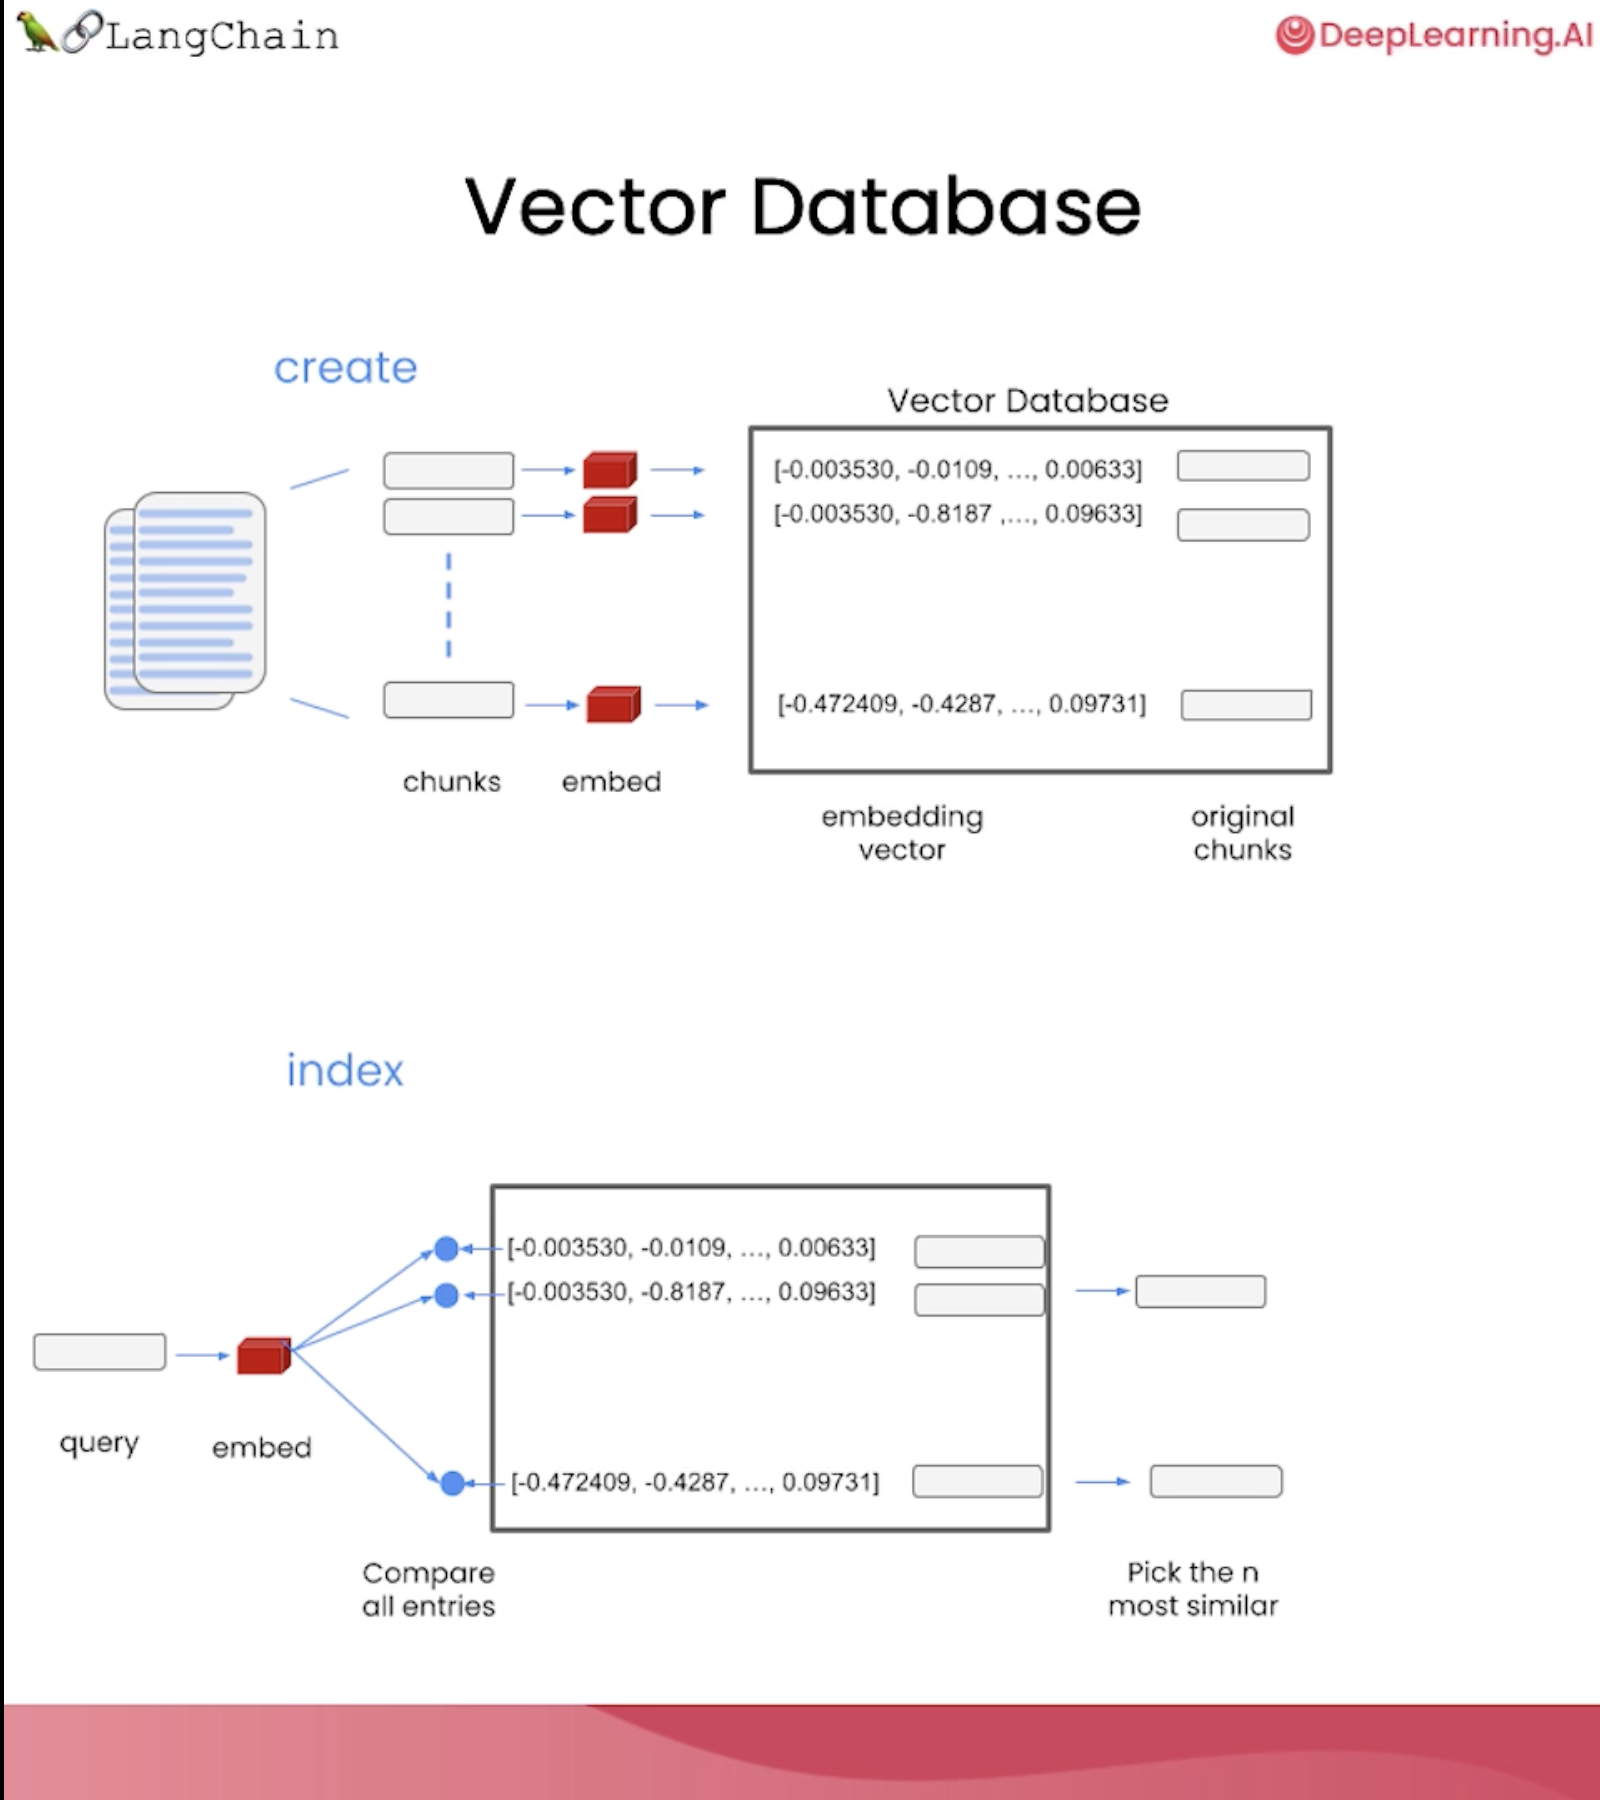
</div>


<div>
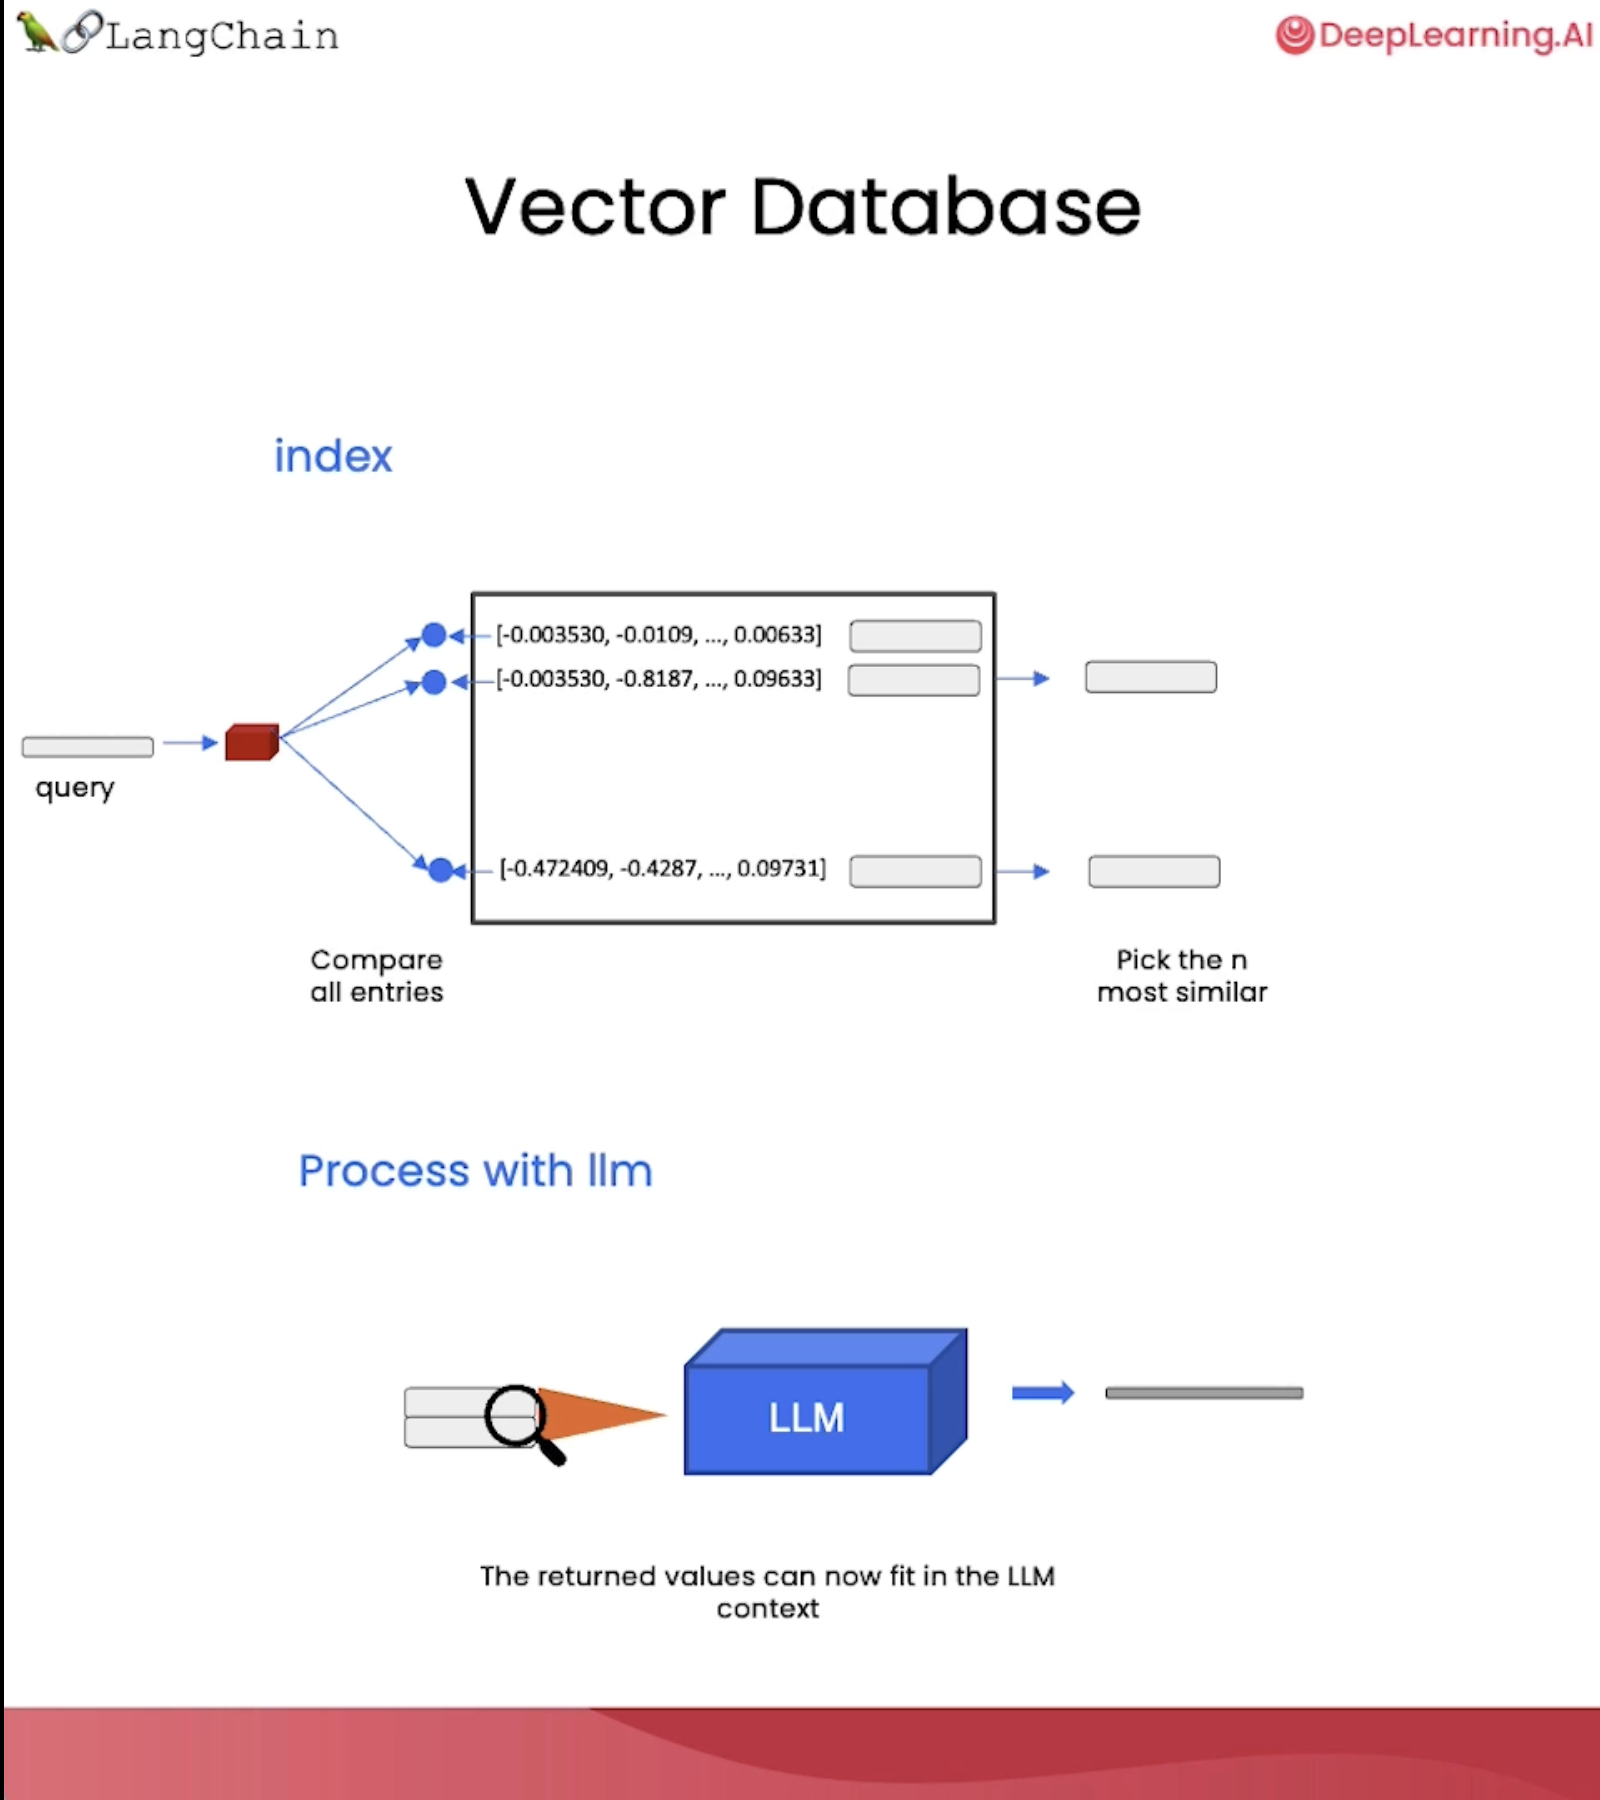
</div>

### Step By Step

In [22]:
file = 'OutdoorClothingCatalog_1000.csv'
loader = CSVLoader(file_path=file)

In [23]:
docs = loader.load()
docs[0]

Document(metadata={'source': 'OutdoorClothingCatalog_1000.csv', 'row': 0}, page_content=": 0\nname: Women's Campside Oxfords\ndescription: This ultracomfortable lace-to-toe Oxford boasts a super-soft canvas, thick cushioning, and quality construction for a broken-in feel from the first time you put them on. \n\nSize & Fit: Order regular shoe size. For half sizes not offered, order up to next whole size. \n\nSpecs: Approx. weight: 1 lb.1 oz. per pair. \n\nConstruction: Soft canvas material for a broken-in feel and look. Comfortable EVA innersole with Cleansport NXT® antimicrobial odor control. Vintage hunt, fish and camping motif on innersole. Moderate arch contour of innersole. EVA foam midsole for cushioning and support. Chain-tread-inspired molded rubber outsole with modified chain-tread pattern. Imported. \n\nQuestions? Please contact us for any inquiries.")

In [20]:
from langchain_google_genai import GoogleGenerativeAIEmbeddings

embeddings = GoogleGenerativeAIEmbeddings(model="models/embedding-001")
embed = embeddings.embed_query("Hi my name is Luize")
embed[:5]


[0.03410932421684265,
 -0.01125258021056652,
 -0.03569301590323448,
 -0.02842782437801361,
 0.011503909714519978]

In [24]:
# Embedding all the documents with the google gemini embed model, and storing it on the memory with DocArrayInMemorySearch
db = DocArrayInMemorySearch.from_documents(
    documents=docs, 
    embedding=embeddings
)

In [25]:
query = "Please suggest a shirt for tennis practice"

In [26]:
docs = db.similarity_search(query)

In [27]:
len(docs)

4

In [28]:
docs[0]

Document(metadata={'source': 'OutdoorClothingCatalog_1000.csv', 'row': 357}, page_content=": 357\nname: Ultimate Two-Layer Polo\ndescription: This women's slightly fitted polo shirt is crafted with premium long-staple 100% cotton, honeycomb-knit and garment-washed for softness. It's comfortable enough for the tennis court yet tailored for everyday wear and designed to last season after season. It features classic polo styling with a no-roll collar and resists fading, pilling, shrinking and wrinkles. Machine wash and dry. Imported. Size & Fit: Slightly Fitted: Softly shapes the body. Falls at hip. \n\n for Business offers volume discounts of up to 20% on this product. Add your logo for business outfitting, gear and gifts. Your Logo. Our Quality.")

In [39]:
# A retriever to connect the wuery to the docs
# Create a retriever from this vector store. A retriever is a generic interface that can be underpinned by any method that takes in a query and returns documents
retriever = db.as_retriever()
qdocs = "".join([docs[i].page_content for i in range(len(docs))])

In [33]:
response = llm.invoke(f"{qdocs} Question: Please list all your \
shirts for tennis practice in a table in markdown and summarize each one.") 

In [35]:
response

AIMessage(content='Based on the provided descriptions, only one shirt is explicitly suitable for tennis practice.  The others are more general purpose or geared towards hiking.\n\n| ID | Name                     | Summary                                                                                                       |\n|----|--------------------------|---------------------------------------------------------------------------------------------------------------|\n| 357 | Ultimate Two-Layer Polo | A slightly fitted, premium cotton polo shirt designed for comfort and durability, suitable for tennis and everyday wear.  Features a no-roll collar and resists wrinkles and fading. |', additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': []}, id='run-2c2fb4c1-3a2f-47df-b9d8-c5dc5c325ca4-0', usage_metadata={'input_tokens': 601, 'output_tokens': 104, 'total_tokens': 705, 'input_token_details': {'ca

In [36]:
# Wrapping everything together
qa_stuff = RetrievalQA.from_chain_type(
    llm=llm, 
    chain_type="stuff", # stuffes all the documents in to context, and makes one call to a language model
    retriever=retriever, #fetch documents and pass it to the language model
    verbose=True
)

In [38]:
query =  "Please list all your shirts for tennis practice in a table \
in markdown and summarize each one."
response = qa_stuff.run(query)
display(Markdown(response))



> Entering new RetrievalQA chain...

> Finished chain.


Based on the provided descriptions, only one shirt is explicitly mentioned as suitable for tennis.  There is no information to suggest the others are inappropriate for tennis, but neither are they explicitly recommended.

| ID | Name                     | Summary                                                                                                                                                                     |
|---|--------------------------|-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| 357 | Ultimate Two-Layer Polo | Women's slightly fitted polo shirt made of premium long-staple 100% cotton.  Comfortable and tailored for everyday wear and tennis, resists fading, pilling, shrinking, and wrinkles. |

<div>
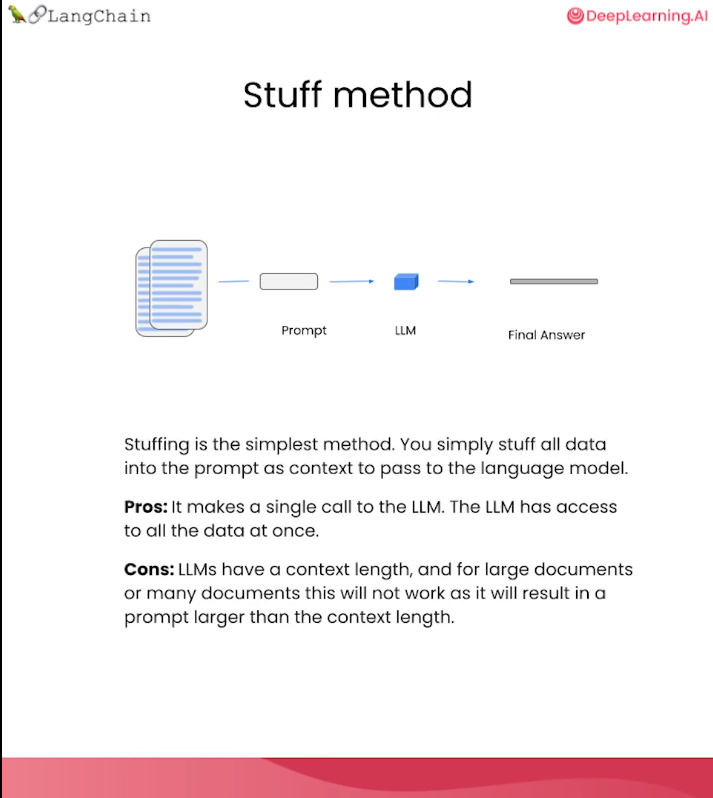
</div>



<div>
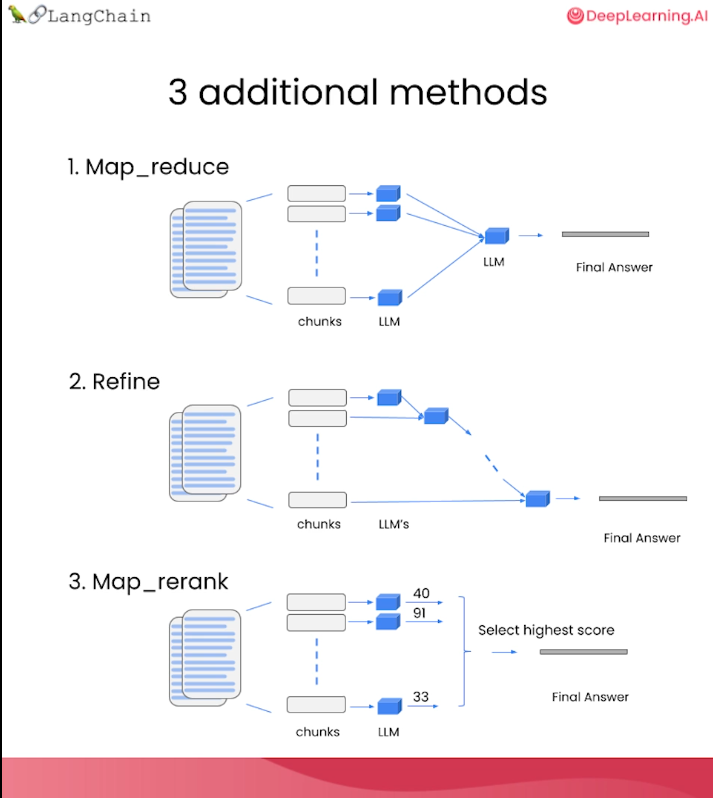
</div>

## LangChain: Evaluation
https://learn.deeplearning.ai/courses/langchain/lesson/dputu/evaluation

### Outline:

* Example generation
* Manual evaluation (and debuging)
* LLM-assisted evaluation
* LangChain evaluation platform

In [18]:
import os
from dotenv import load_dotenv
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain.chains import ConversationChain
from langchain.chains import RetrievalQA

from langchain.document_loaders import CSVLoader
from langchain.indexes import VectorstoreIndexCreator
from langchain.vectorstores import DocArrayInMemorySearch
from langchain_google_genai import GoogleGenerativeAIEmbeddings

load_dotenv()

# MODEL & EMBEDDING
llm = ChatGoogleGenerativeAI(
    model="gemini-1.5-flash", 
    temperature=0
)
embeddings = GoogleGenerativeAIEmbeddings(model="models/text-embedding-004")

### Create our QandA application

In [19]:
file = 'OutdoorClothingCatalog_1000.csv'
loader = CSVLoader(file_path=file)
data = loader.load()

index = VectorstoreIndexCreator(
    embedding=embeddings,
    vectorstore_cls=DocArrayInMemorySearch
).from_loaders([loader])


qa = RetrievalQA.from_chain_type(
    llm=llm, 
    chain_type="stuff", 
    retriever=index.vectorstore.as_retriever(), 
    verbose=True,
    chain_type_kwargs = {
        "document_separator": "<<<<>>>>>"
    }
)

In [20]:
data[11]

Document(metadata={'source': 'OutdoorClothingCatalog_1000.csv', 'row': 11}, page_content=': 11\nname: Ultra-Lofty 850 Stretch Down Hooded Jacket\ndescription: This technical stretch down jacket from our DownTek collection is sure to keep you warm and comfortable with its full-stretch construction providing exceptional range of motion. With a slightly fitted style that falls at the hip and best with a midweight layer, this jacket is suitable for light activity up to 20° and moderate activity up to -30°. The soft and durable 100% polyester shell offers complete windproof protection and is insulated with warm, lofty goose down. Other features include welded baffles for a no-stitch construction and excellent stretch, an adjustable hood, an interior media port and mesh stash pocket and a hem drawcord. Machine wash and dry. Imported.')

In [21]:
examples_manual = [
    {
        "query": "Do the Cozy Comfort Pullover Set\
        have side pockets?",
        "answer": "Yes"
    },
    {
        "query": "What collection is the Ultra-Lofty \
        850 Stretch Down Hooded Jacket from?",
        "answer": "The DownTek collection"
    }
]

### LLM-Generated examples

In [22]:
from langchain.evaluation.qa import QAGenerateChain

In [23]:
example_gen_chain = QAGenerateChain.from_llm(llm)
new_examples = example_gen_chain.apply_and_parse(
    [{"doc": t} for t in data[:5]]
)
print(new_examples[0],'\n\n')
print(data[0])

{'qa_pairs': {'query': 'According to the product description, what specific features contribute to the "broken-in feel" of the Women\'s Campside Oxfords from the moment they are first worn?', 'answer': 'The "broken-in feel" of the Women\'s Campside Oxfords is attributed to their super-soft canvas material and quality construction, as stated in the description.'}} 


page_content=': 0
name: Women's Campside Oxfords
description: This ultracomfortable lace-to-toe Oxford boasts a super-soft canvas, thick cushioning, and quality construction for a broken-in feel from the first time you put them on. 

Size & Fit: Order regular shoe size. For half sizes not offered, order up to next whole size. 

Specs: Approx. weight: 1 lb.1 oz. per pair. 

Construction: Soft canvas material for a broken-in feel and look. Comfortable EVA innersole with Cleansport NXT® antimicrobial odor control. Vintage hunt, fish and camping motif on innersole. Moderate arch contour of innersole. EVA foam midsole for cushio

In [24]:
new_examples = [pair['qa_pairs'] for pair in new_examples]

In [25]:
examples = examples_manual+new_examples


In [26]:
import langchain
langchain.debug = True
qa.run(examples[0]["query"])
langchain.debug = False

[chain/start] [chain:RetrievalQA] Entering Chain run with input:
{
  "query": "Do the Cozy Comfort Pullover Set        have side pockets?"
}
[chain/start] [chain:RetrievalQA > chain:StuffDocumentsChain] Entering Chain run with input:
[inputs]
[chain/start] [chain:RetrievalQA > chain:StuffDocumentsChain > chain:LLMChain] Entering Chain run with input:
{
  "question": "Do the Cozy Comfort Pullover Set        have side pockets?",
  "context": ": 73\nname: Cozy Cuddles Knit Pullover Set\ndescription: Perfect for lounging, this knit set lives up to its name. We used ultrasoft fabric and an easy design that's as comfortable at bedtime as it is when we have to make a quick run out. \n\nSize & Fit \nPants are Favorite Fit: Sits lower on the waist. \nRelaxed Fit: Our most generous fit sits farthest from the body. \n\nFabric & Care \nIn the softest blend of 63% polyester, 35% rayon and 2% spandex.\n\nAdditional Features \nRelaxed fit top with raglan sleeves and rounded hem. \nPull-on pants have 

### LLM assisted evaluation

In [27]:
from langchain.evaluation.qa import QAEvalChain
predictions = qa.apply(examples)

eval_chain = QAEvalChain.from_llm(llm)
graded_outputs = eval_chain.evaluate(examples, predictions)
for i, eg in enumerate(examples):
    print(f"Example {i}:")
    print("Question: " + predictions[i]['query'])
    print("Real Answer: " + predictions[i]['answer'])
    print("Predicted Answer: " + predictions[i]['result'])
    print("Predicted Grade: " + graded_outputs[i]['results'])



> Entering new RetrievalQA chain...

> Finished chain.


> Entering new RetrievalQA chain...

> Finished chain.


> Entering new RetrievalQA chain...

> Finished chain.


> Entering new RetrievalQA chain...

> Finished chain.


> Entering new RetrievalQA chain...

> Finished chain.


> Entering new RetrievalQA chain...

> Finished chain.


> Entering new RetrievalQA chain...

> Finished chain.
Example 0:
Question: Do the Cozy Comfort Pullover Set        have side pockets?
Real Answer: Yes
Predicted Answer: Yes, the Cozy Comfort Pullover Set has pull-on pants with side pockets.
Predicted Grade: GRADE: CORRECT
Example 1:
Question: What collection is the Ultra-Lofty         850 Stretch Down Hooded Jacket from?
Real Answer: The DownTek collection
Predicted Answer: The Ultra-Lofty 850 Stretch Down Hooded Jacket is from the DownTek collection.
Predicted Grade: GRADE: INCORRECT
Example 2:
Question: According to the product description, what specific features contribute to the "broken-in fee

In [74]:
graded_outputs[0]

{'results': 'GRADE: CORRECT'}

## LangChain: Agents
https://learn.deeplearning.ai/courses/langchain/lesson/kmiw3/agents

### Outline:

* Using built in LangChain tools: DuckDuckGo search and Wikipedia
* Defining your own tools

In [88]:
import os
from dotenv import load_dotenv
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain.chains import ConversationChain
from langchain.chains import RetrievalQA

from langchain.document_loaders import CSVLoader
from langchain.indexes import VectorstoreIndexCreator
from langchain.vectorstores import DocArrayInMemorySearch
from langchain_google_genai import GoogleGenerativeAIEmbeddings


# TOOLS AND AGENTS
from langchain_experimental.agents.agent_toolkits import create_python_agent
from langchain.agents import load_tools, initialize_agent
from langchain.agents import AgentType

# from langchain_experimental.tools.python.tool import PythonREPLTooL
from langchain_experimental.utilities import PythonREPL



import warnings
warnings.filterwarnings("ignore")

load_dotenv()

# MODEL & EMBEDDING
llm = ChatGoogleGenerativeAI(
    model="gemini-1.5-flash", 
    temperature=0
)
embeddings = GoogleGenerativeAIEmbeddings(model="models/text-embedding-004")

In [96]:
tools = load_tools(["llm-math","wikipedia"], llm=llm)
agent= initialize_agent(
    tools, 
    llm, 
    agent=AgentType.CHAT_ZERO_SHOT_REACT_DESCRIPTION,
    # handle_parsing_errors=True,
    verbose = True)

In [ ]:
agent("What is the 25% of 300?")

In [98]:
question = "Tom M. Mitchell is an American computer scientist \
and the Founders University Professor at Carnegie Mellon University (CMU)\
what book did he write?"
result = agent(question) 



> Entering new AgentExecutor chain...
Question: Tom M. Mitchell is an American computer scientist and the Founders University Professor at Carnegie Mellon University (CMU)what book did he write?
Thought: I need to find out what book Tom M. Mitchell wrote.  I can use wikipedia to search for his publications.
Action:
```json
{
  "action": "wikipedia",
  "action_input": "Tom M. Mitchell"
}
```
Observation: Page: Tom M. Mitchell
Summary: Tom Michael Mitchell (born August 9, 1951) is an American computer scientist and the Founders University Professor at Carnegie Mellon University (CMU). He is a founder and former chair of the Machine Learning Department at CMU. Mitchell is known for his contributions to the advancement of machine learning, artificial intelligence, and cognitive neuroscience and is the author of the textbook Machine Learning. He is a member of the United States National Academy of Engineering since 2010. He is also a Fellow of the American Academy of Arts and Sciences, th

In [107]:
agent_python = create_python_agent(
    llm,
    tool=PythonREPLTool(),
    verbose=True
)
customer_list = [["Harrison", "Chase"], 
                 ["Lang", "Chain"],
                 ["Dolly", "Too"],
                 ["Elle", "Elem"], 
                 ["Geoff","Fusion"], 
                 ["Trance","Former"],
                 ["Jen","Ayai"]
                ]
agent_python.run(f"""Sort these customers by \
last name and then first name \
and print the output: {customer_list}""") 



> Entering new AgentExecutor chain...


Python REPL can execute arbitrary code. Use with caution.


Thought: I need to sort the list of lists based on the last name and then the first name.  I'll use the `sorted()` function with a custom key.
Action: Python_REPL
Action Input: 
```python
customers = [['Harrison', 'Chase'], ['Lang', 'Chain'], ['Dolly', 'Too'], ['Elle', 'Elem'], ['Geoff', 'Fusion'], ['Trance', 'Former'], ['Jen', 'Ayai']]
sorted_customers = sorted(customers, key=lambda x: (x[0], x[1]))
print(sorted_customers)
```
Observation: [['Dolly', 'Too'], ['Elle', 'Elem'], ['Geoff', 'Fusion'], ['Harrison', 'Chase'], ['Jen', 'Ayai'], ['Lang', 'Chain'], ['Trance', 'Former']]

Thought:Thought: I now know the final answer
Final Answer: [['Dolly', 'Too'], ['Elle', 'Elem'], ['Geoff', 'Fusion'], ['Harrison', 'Chase'], ['Jen', 'Ayai'], ['Lang', 'Chain'], ['Trance', 'Former']]

> Finished chain.


"[['Dolly', 'Too'], ['Elle', 'Elem'], ['Geoff', 'Fusion'], ['Harrison', 'Chase'], ['Jen', 'Ayai'], ['Lang', 'Chain'], ['Trance', 'Former']]"

### Define your own tool

In [99]:
from langchain.agents import tool
from datetime import date

In [103]:
@tool
def time(text: str) -> str:
    """Returns todays date, use this for any \
    questions related to knowing todays date. \
    The input should always be an empty string, \
    and this function will always return todays \
    date - any date mathmatics should occur \
    outside this function."""
    return str(date.today())

agent= initialize_agent(
    tools + [time], 
    llm, 
    agent=AgentType.CHAT_ZERO_SHOT_REACT_DESCRIPTION,
    handle_parsing_errors=False,
    verbose = True)

In [ ]:
try:
    result = agent("whats the date today?") 
except: 
    print("exception on external access")